In [1]:
#### import librarires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import numpy as np
import os

# automatically disable all pink warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#### This is a function for reading SAS(.XPT) files, convert them to Pandas Dataframeand merge them###
def merge_xpt(fname): 
    import xport
    import numpy as np

    if type(fname)==list:     
        df=[]
        for f in fname:
            with open(f, 'rb') as file:
                df.append(xport.to_dataframe(file))
        all_files = np.array(df) #store all datasets in a np.array
    
        #merge data.frames
    
        for i in range(len(fname)-1):
            df[0]=df[0].merge(df[i+1],on=['SEQN'])
        return all_files, df[0]
        
    with open(fname, 'rb') as file:
        df = xport.to_dataframe(file)
    return df

In [3]:
fname = ["C:/Users/yasig/Downloads/Visualization/Vis Project/PAQ_J.XPT",
        "C:/Users/yasig/Downloads/Visualization/Vis Project/SLQ_J.XPT",
        "C:/Users/yasig/Downloads/Visualization/Vis Project/SMQ_J.XPT",
        "C:/Users/yasig/Downloads/Visualization/Vis Project/TCHOL_J.XPT",
        "C:/Users/yasig/Downloads/Visualization/Vis Project/BMX_J.XPT",
        "C:/Users/yasig/Downloads/Visualization/Vis Project/DEMO_J.XPT",
        "C:/Users/yasig/Downloads/Visualization/Vis Project/DIQ_J.XPT"]


In [4]:
files, merged = merge_xpt(fname)
merged.shape

(5533, 183)

In [5]:
merged.head(5)

,SEQN,PAQ605,PAQ610,PAD615,PAQ620,PAQ625,PAD630,PAQ635,PAQ640,PAD645,...,DIQ300D,DID310S,DID310D,DID320,DID330,DID341,DID350,DIQ350U,DIQ360,DIQ080
0,93705.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93706.0,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93708.0,2.0,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,93709.0,2.0,NaN,NaN,1.0,2.0,180.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,93711.0,2.0,NaN,NaN,2.0,NaN,NaN,1.0,5.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# merge Gender, Race and Diabetes columns
df = merged[['DIQ010','RIAGENDR','RIDRETH3']]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5533 entries, 0 to 5532
Data columns (total 3 columns):
DIQ010      5533 non-null float64
RIAGENDR    5533 non-null float64
RIDRETH3    5533 non-null float64
dtypes: float64(3)
memory usage: 172.9 KB


In [8]:
df.isnull().sum()

DIQ010      0
RIAGENDR    0
RIDRETH3    0
dtype: int64

In [9]:
# change column name
df = df.rename(index=str, columns={'DIQ010':'Diabetes','RIAGENDR':'Gender','RIDRETH3':'Race'})

In [10]:
df.shape

(5533, 3)

In [11]:
df.head(10)

,Diabetes,Gender,Race
0,2.0,2.0,4.0
1,2.0,1.0,6.0
2,3.0,2.0,6.0
3,2.0,2.0,4.0
4,2.0,1.0,6.0
5,2.0,1.0,1.0
6,2.0,1.0,3.0
7,1.0,2.0,4.0
8,2.0,1.0,7.0
9,2.0,1.0,6.0


In [12]:
# rename the code in dataset based on its race
def conditions(data):
    if (data['Race'] ==1)  :
        return "Mexican American"
    elif (data['Race'] ==2):
        return "Other Hispanic"
    elif (data['Race'] ==3):
        return "White"
    elif (data['Race'] ==4):
        return "Black"
    elif (data['Race'] ==6):
        return "Asian"
    elif (data['Race'] ==7):
        return "Multi-Racial Or Other Race"


In [13]:
# Add  'Class' column for further analysis
df['Class'] = df.apply(conditions, axis=1)

In [14]:
df.head(10)

,Diabetes,Gender,Race,Class
0,2.0,2.0,4.0,Black
1,2.0,1.0,6.0,Asian
2,3.0,2.0,6.0,Asian
3,2.0,2.0,4.0,Black
4,2.0,1.0,6.0,Asian
5,2.0,1.0,1.0,Mexican American
6,2.0,1.0,3.0,White
7,1.0,2.0,4.0,Black
8,2.0,1.0,7.0,Multi-Racial Or Other Race
9,2.0,1.0,6.0,Asian


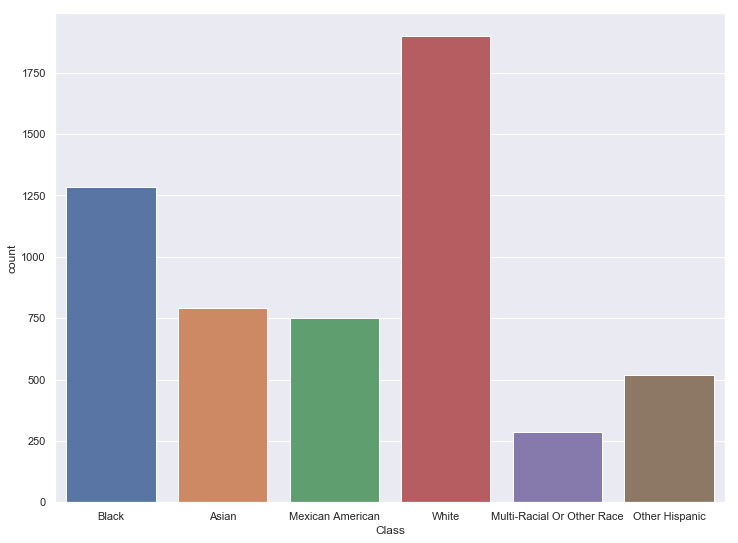

In [15]:
# plot different races 
sns.set(rc={'figure.figsize':(12,9)})
a = sns.countplot(x ="Class", data=df)

In [16]:
# Since our datsaet is imbalanced, I did undersampling
df_majority_1 = df[df.Class=='Mexican American']
df_majority_2 = df[df.Class=='Other Hispanic']
df_majority_3 = df[df.Class=='White']
df_majority_4 = df[df.Class=='Black']
df_majority_5 = df[df.Class=='Asian']
df_majority_6 = df[df.Class=='Multi-Racial Or Other Race']

In [17]:
df_majority_6.shape

(288, 4)

In [29]:
# undersampling based on multi race population
np.random.seed(265157)
df_majority_1_balanced = df_majority_1.sample(df_majority_6.shape[0])
df_majority_2_balanced = df_majority_2.sample(df_majority_6.shape[0])
df_majority_3_balanced = df_majority_3.sample(df_majority_6.shape[0])
df_majority_4_balanced = df_majority_4.sample(df_majority_6.shape[0])
df_majority_5_balanced = df_majority_5.sample(df_majority_6.shape[0])

In [32]:
# concat subsets and extract people with dataset. In original dataset 1 means doctor said a persion has diabetes
train_balanced = pd.concat([df_majority_6,df_majority_1_balanced,df_majority_2_balanced,df_majority_3_balanced,df_majority_4_balanced,df_majority_5_balanced])
train_balanced_Have_Diabetes = train_balanced[train_balanced.Diabetes ==1]

In [31]:
train_balanced_Have_Diabetes.shape

(246, 4)

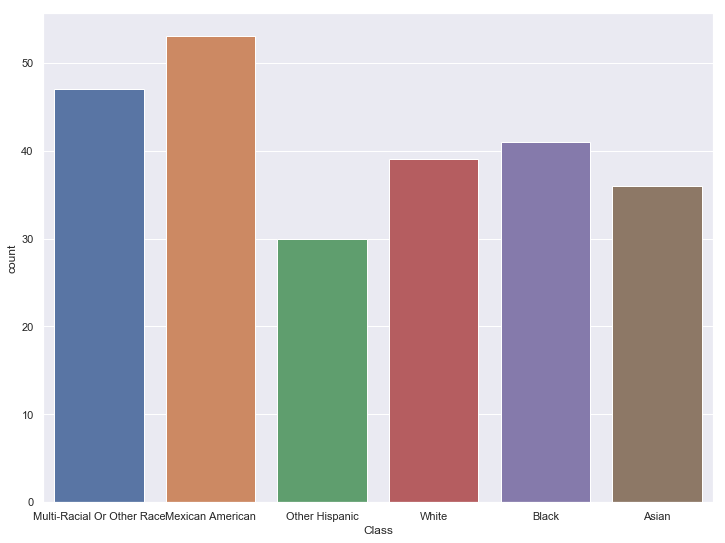

In [24]:
a2 = sns.countplot(x ="Class", data=train_balanced_Have_Diabetes)

In [33]:
train_balanced_Have_Diabetes.head(5)

,Diabetes,Gender,Race,Class
34,1.0,1.0,7.0,Multi-Racial Or Other Race
342,1.0,1.0,7.0,Multi-Racial Or Other Race
357,1.0,1.0,7.0,Multi-Racial Or Other Race
687,1.0,1.0,7.0,Multi-Racial Or Other Race
781,1.0,1.0,7.0,Multi-Racial Or Other Race


In [26]:
train_balanced_Have_Diabetes.to_csv("C:/Users/yasig/Downloads/NHANES_Dia2.csv")


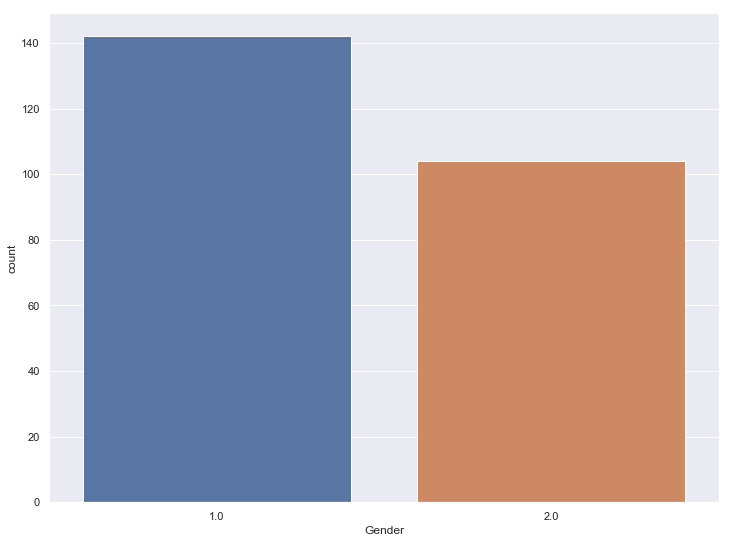

In [34]:
# visualize diabetes people base on gender
a3 = sns.countplot(x ="Gender", data=train_balanced_Have_Diabetes)